In [1]:
# import neccessary libraries 
import tifffile
import numpy as np
from PIL import Image
import os 
from tqdm import tqdm 
from tkinter import Tcl

# My utilies 
from poreUtils import * 

In [13]:
data_dir = 'D:\\sagar\\Data\\MD_1264_A4_1_Z0.0mm_Z3.3mm_corr_phrt\\roi\\'
selected_files = os.listdir(data_dir)

out_dir = 'D:\\sagar\\Data\\MD_1264_A4_1_Z0.0mm_Z3.3mm_corr_phrt\\result\\'

In [14]:
# global min and max 
gbMin = 0.0005
gbMax = 0.003


In [15]:
for afile in tqdm(selected_files):
    file_path = os.path.join(data_dir, afile)
    raw_vol = []
    #sorting the slices according to their names like in windows 
    slices = Tcl().call('lsort', '-dict', os.listdir(file_path))
    for aSlice in slices:
        img = Image.open(os.path.join(file_path, aSlice))
        imgarray = np.array(img)
        raw_vol.append(imgarray)
        
    raw_vol = np.asarray(raw_vol)
    raw_vol = np.clip(raw_vol, a_min=gbMin, a_max=gbMax)
    raw_vol = norm8bit(raw_vol, minVal=gbMin, maxVal=gbMax)
    fName = os.path.join(out_dir, afile)
    raw_vol.tofile(fName + '_8bit.raw')


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [01:02<00:00,  2.31s/it]


In [5]:
afile

'1000-1300x1050-1350x1600-1900'

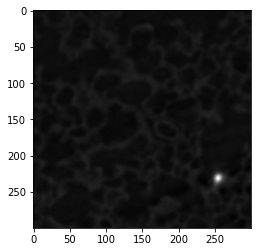

In [47]:
plt.imshow(rawb_vol[27, ...], cmap='gray')

In [48]:
#raw_vol1 = rawb_vol[::4, ::4, ::4]

In [49]:
from skimage.filters.rank import otsu

from skimage.morphology import cube

In [56]:
raw_vol.shape

(300, 300, 300)

In [64]:
raw=norm8bit(rawb_vol)

In [65]:
raw.max()

255

In [70]:
local_otsu = otsu(raw, cube(4))

In [71]:
thresh_image = raw >= local_otsu

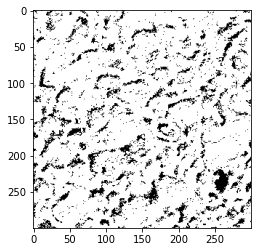

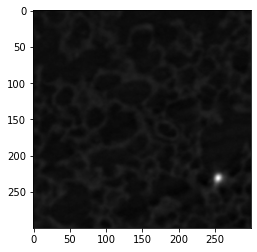

In [73]:
plt.imshow(thresh_image[27, ...], cmap='gray')
plt.show()
plt.imshow(raw[27, ...], cmap='gray')
plt.show()

In [42]:
raw_path = 'D:\\sagar\\Data\\MD_1264_A3_1_Z3.3mm\\tiles\\0-300x1000-1300x1400-1700\\'
rawb_vol = []
#sorting the slices according to their names like in windows 
slices = Tcl().call('lsort', '-dict', os.listdir(raw_path))
for aSlice in slices:
    img = Image.open(os.path.join(raw_path, aSlice))
    imgarray = np.array(img)
    rawb_vol.append(imgarray)

In [43]:
rawb_vol = np.asarray(rawb_vol)

In [44]:
rawb_vol.shape

(300, 300, 300)